In [1]:
from sklearn.neighbors import DistanceMetric

유클리드 거리

In [2]:
X = [[5,4,3],[1,7,9]]

dist_euclidean = DistanceMetric.get_metric('euclidean')
print(dist_euclidean.pairwise(X))

[[0.         7.81024968]
 [7.81024968 0.        ]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


맨해튼 거리

In [5]:
dist_manhattan = DistanceMetric.get_metric('manhattan')
print(dist_manhattan.pairwise(X))

[[ 0. 13.]
 [13.  0.]]


해밍거리(Hamming Distance) : 
정확히 같은 지 여부만고려. 다른 값을 count 한다.
한 문자열을 다른 문자열로 바꾸기 위해 몇 글자를 바꾸어야 하는 지를 정의한다.
고정 길이의 이진 데이터에서 서로 다른 비트 부호수를 갖는 문자 개수를 찾는다.

In [6]:
dist_hamming = DistanceMetric.get_metric('hamming')
print(dist_hamming.pairwise(X)) # X = [[5,4,3],[1,7,9]]

[[0. 1.]
 [1. 0.]]


In [7]:
Y = [[1,4,3],[1,7,9]]
print(dist_hamming.pairwise(Y))
# 3개 중에서 2개만 바꾸면 되니까 0.67 % 정도 바꾸면 된다는... 그런 개수를 찾는다.
# 정확하게 같은 지에 대한 여부만 고려한다. 이 여부에서 다른 값을 count 하는 것

[[0.         0.66666667]
 [0.66666667 0.        ]]


민코우스키거리 :
두 가지 거리 (맨해튼거리, 유클리드 거리) 를 일반화한 거리이다.
r=1 은 맨해튼거리, r=2 는 유클리드 거리이다.

In [9]:
dist_minkowski = DistanceMetric.get_metric('minkowski', p=2) # 유클리드 거리
print(dist_minkowski.pairwise(X))

# 유클리드 거리를 위에서 구한 것과 동일하게 나왔다.

[[0.         7.81024968]
 [7.81024968 0.        ]]


In [11]:
dist_minkowski = DistanceMetric.get_metric('minkowski', p=1) # 맨해튼 거리
print(dist_minkowski.pairwise(X))

# 맨해튼 거리를 위에서 구한 것과 동일하게 나왔다.

[[ 0. 13.]
 [13.  0.]]


# K-NN 실습

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
## 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier ## K-NN
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
## 데이터셋
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
data = load_breast_cancer()

# 독립변수 (inpurt data)
b_input_data = data['data']

# 종양 : 악성(0), 양성(1) 여부 (target data)
b_target_data  = data['target']

# 종양 구분
tumar = data['target_names']

In [61]:
# 속성 명칭
feature_names = data['feature_names']

print('종양 여부 결정 속성 : {}'.format(feature_names))
print('종양 구분 : {}'.format(tumar))

breast_df  = pd.DataFrame(b_input_data, columns = feature_names)
breast_df['target'] = b_target_data

종양 여부 결정 속성 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
종양 구분 : ['malignant' 'benign']


In [62]:
breast_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [63]:
# 속성명 공백에 '_' 달기
breast_df.columns = [col.replace(" ", "_") for col in breast_df.columns]

In [64]:
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [65]:
# label 데이터 비율 확인
breast_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [66]:
## 학습 데이터셋 생성
# 평균 관련된 3개의 속성으로 종양 여부 판단
model_feature_name = ['mean_radius', 'mean_texture', 'mean_perimeter']
X = breast_df[model_feature_name]
Y = breast_df['target']

# 80% 데이터를 학습 데이터로, 20% 를 테스트 데이터로.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state= 20)

In [67]:
## 스케일링 & 정규화 : 거리 기반 알고리즘은 기본으로 표준화, 정규화 수행이 필요하다.
from sklearn.preprocessing import StandardScaler

## 스케일링 & 정규화
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# 스케일링 (각 속성 3개에 대한 표준화 수행 결과 확인)
for col  in range(3) : 
    print(f'평균 = {X_train_std[:,col].mean()}, 표준편차 {X_train_std[:,col].std()}')
          
for col in range(3) : 
    print(f'평균 = {X_test_std[:,col].mean()}, 표준편차  = {X_test_std[:,col].std()}')

평균 = -6.109886711343719e-16, 표준편차 1.0000000000000002
평균 = -3.2833320921661774e-15, 표준편차 1.0000000000000002
평균 = 2.851931145454688e-15, 표준편차 1.0000000000000004
평균 = -1.1472304587793285e-15, 표준편차  = 1.0
평균 = 4.4798472923471226e-17, 표준편차  = 0.9999999999999999
평균 = -1.1842378929335002e-15, 표준편차  = 0.9999999999999998


In [68]:
## 학습 / 예측
# k-NN 분류기를 생성
# 가장 가까운 3개 중에 A:1, C:2 이면 타겟 데이터는 C로 분류한다.
knn_clf = KNeighborsClassifier(n_neighbors = 3)

# 분류기 학습
knn_clf.fit(X_train_std, y_train)

# 예측
y_pred = knn_clf.predict(X_test_std)

In [69]:
## 모델 평가
print("테스트 세트 정확도 : {:.2f}".format(knn_clf.score(X_test_std, Y_test)))


테스트 세트 정확도 : 0.91


In [70]:

conf_Matrix = confusion_matrix(y_test, y_pred)
print(conf_Matrix)

report = classification_report(y_test, y_pred)
print(report)

[[42  6]
 [ 4 62]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        48
           1       0.91      0.94      0.93        66

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [71]:
## 모델 개선 - k값을 변화시킬 때, accuracy 가 증가하는 지 확인
accuracy_knn = []

In [72]:
for i in range(1,31) : 
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_std, y_train)
    pred_i = knn.predict(X_test_std)
    accuracy_knn.append(knn.score(X_test_std, y_test))
    
print(accuracy_knn)

[0.8859649122807017, 0.8771929824561403, 0.9122807017543859, 0.9122807017543859, 0.956140350877193, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702]


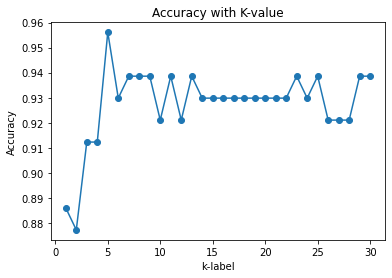

In [75]:
plt.plot(range(1,31), accuracy_knn, marker = 'o')
plt.title("Accuracy with K-value")
plt.xlabel('k-label')
plt.ylabel('Accuracy')
plt.show()

In [76]:
## Accuracy 결과로 학습 / 예측 (Training/Prediction)
knn_clf = KNeighborsClassifier(n_neighbors = 5)

# 분류기 학습
knn_clf.fit(X_train_std, y_train)

# 예측
y_pred = knn_clf.predict(X_test_std)
print("예측결과:\n", y_pred[:10])

# test_set
print("정답 : \n", list(y_test)[:10])

예측결과:
 [1 0 0 1 0 0 0 1 1 0]
정답 : 
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 0]


In [77]:
# 모델 평가
print("테스트 세트 정확도 : {:.2f}".format(knn_clf.score(X_test_std, y_test)))

# 테스트 세트 정확도 0.91

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

report = classification_report(y_test, y_pred)
print(report)

테스트 세트 정확도 : 0.96
[[44  4]
 [ 1 65]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.94      0.98      0.96        66

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

